In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
## Dataset
mean_01 = np.array([0.0, 0.0])
cov_01 = np.array([[1.0, 0.8], [0.7, 1.6]])

data = np.random.multivariate_normal(mean_01, cov_01, 800)
print data.shape

(800, 2)


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  """


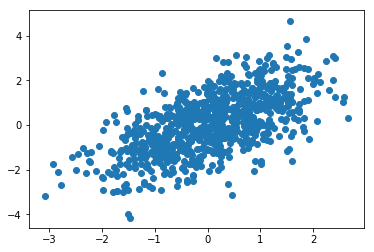

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [32]:
def PCA(X, m=None):
    if m is None:
        m = X.shape[1]
        
    ## Find Covariance Matrix
    A = np.cov(X, rowvar=False)
    
    ## Eigenvalues and Eigenvectors
    eig_val, eig_vec = np.linalg.eig(A)
    
    ## Project points to new space
    Z = X.dot(eig_vec)
    
    ## Choose m dimensions
    red_Z = Z[:, -m-1:]
    
    return eig_val, eig_vec, Z, red_Z

In [33]:
print 'Original Data Shape: ', data.shape 
eig_val, eig_vec, Z, red_Z = PCA(data, m=1)

print 'Eig_Vals shape: ', eig_val.shape
print 'Eig_Vecs shape: ', eig_vec.shape
print 'Z shape: ', Z.shape
print 'Red_Z shape: ', red_Z.shape

Original Data Shape:  (800, 2)
Eig_Vals shape:  (2,)
Eig_Vecs shape:  (2, 2)
Z shape:  (800, 2)
Red_Z shape:  (800, 2)


In [34]:
print eig_val
print eig_vec

[0.47182174 2.27034972]
[[-0.83865691 -0.54466006]
 [ 0.54466006 -0.83865691]]


(800,)


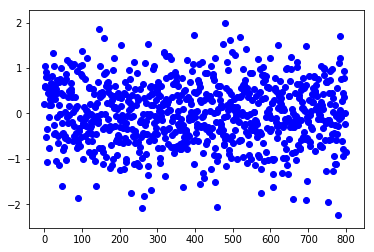

In [35]:
indexes = np.array(range(red_Z.shape[0]))
print indexes.shape
for ix in range(red_Z.shape[0]):
    plt.scatter(indexes[ix], red_Z[ix,0],c='b')

plt.show()

In [36]:
info = []
for ix in range(eig_val.shape[0]):
    dx = [eig_val[ix], eig_vec[:, ix]]
    info.append(dx)
print info

[[0.47182174172742863, array([-0.83865691,  0.54466006])], [2.2703497164211663, array([-0.54466006, -0.83865691])]]


In [37]:
for k in info:
    print k

[0.47182174172742863, array([-0.83865691,  0.54466006])]
[2.2703497164211663, array([-0.54466006, -0.83865691])]


In [13]:
info = sorted(info, key=lambda z:z[0], reverse=True)

In [14]:
sorted_vals = []
sorted_vecs = []
for ix in range(len(info)):
    sorted_vals.append(info[ix][0])
    sorted_vecs.append(info[ix][1])
print sorted_vals

[2.2703497164211663, 0.47182174172742863]


In [16]:
sorted_vals = np.array(sorted_vals)
explained_variances_ratio = sorted_vals/sum(sorted_vals)
print explained_variances_ratio

[0.82793864 0.17206136]


In [9]:
'''Homework Assignment'''

'Homework Assignment'

In [17]:
ds = pd.read_csv('/Users/ayush/Downloads/fashionmnist/fashion-mnist_test.csv')

In [18]:
ds.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
input_data = ds.values[:, 1:]
print input_data.shape

(10000, 784)
